<a href="https://colab.research.google.com/github/Nirmalbhatii/CMCA546_NLP/blob/main/S25MCAG0039_LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package

Total tokens (with stopwords): 84650
Tokens after removing stopwords: 47691


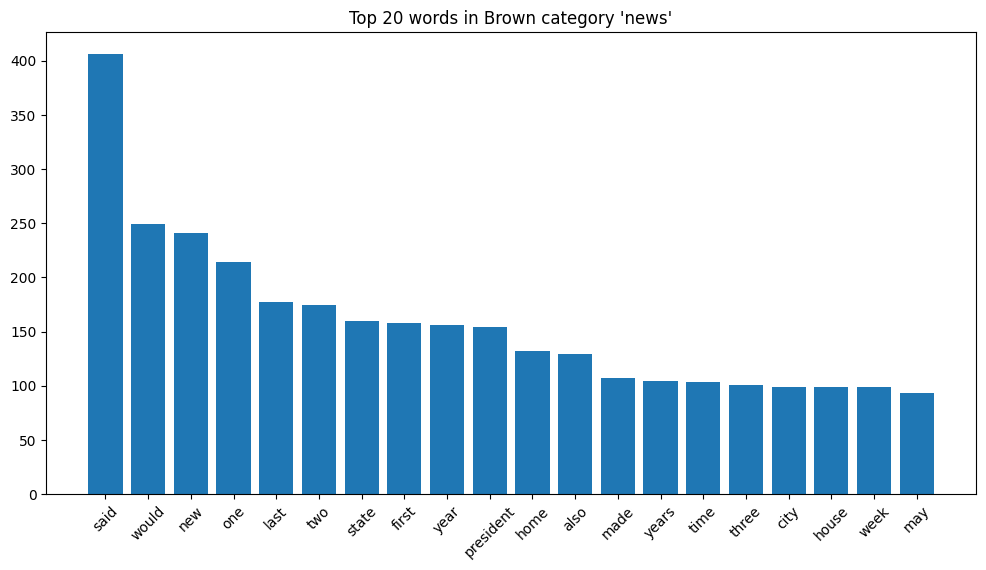

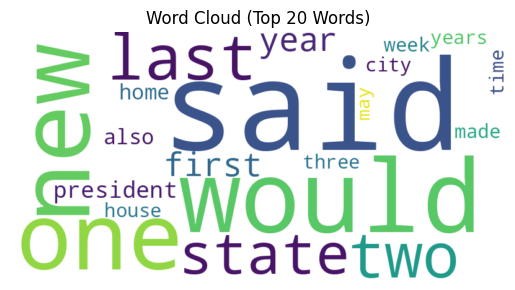


Top 10 stems:
     Stem  Frequency
0    said        406
1    year        260
2   would        249
3     new        241
4   state        229
5     one        222
6    last        179
7     two        174
8  presid        159
9   first        158

Top 10 lemmas:
   Lemma  Frequency
0    say        465
1   year        260
2  would        249
3    new        244
4  state        227
5    one        222
6   make        186
7   last        178
8    two        174
9  first        158

Comparison table (first 5 rows):
    Word  Original_Freq   Stem  Stem_Freq  Lemma  Lemma_Freq
0   said            406   said        406    say         465
1  would            249  would        249  would         249
2    new            241    new        241    new         243
3    one            214    one        222    one         222
4   last            177   last        179   last         179


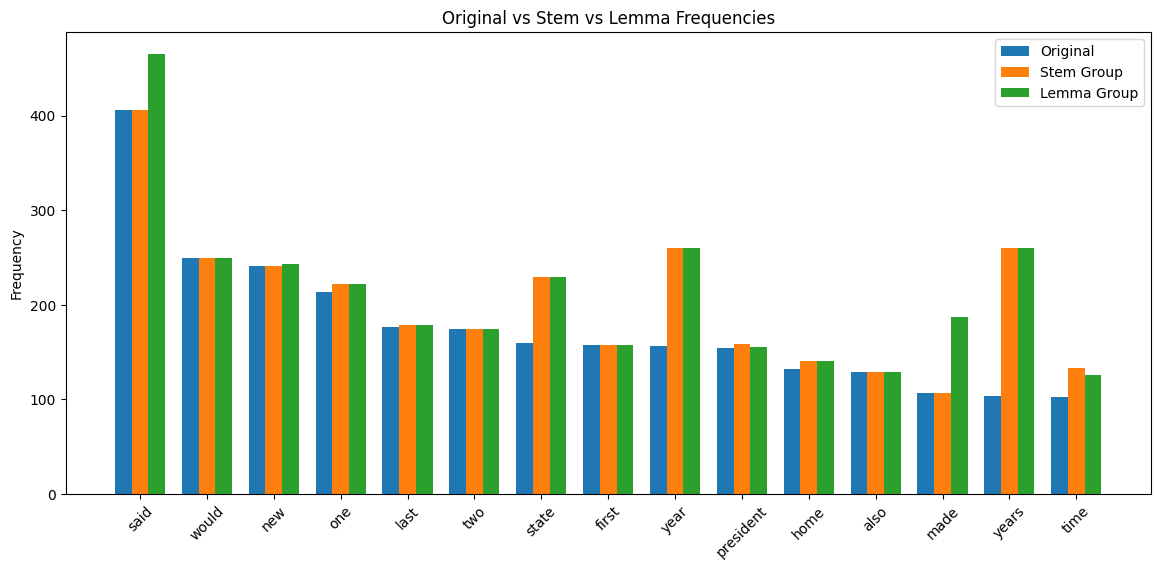

In [6]:

import nltk


nltk.download('brown')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from nltk.corpus import brown, stopwords, wordnet
from nltk import word_tokenize, FreqDist, pos_tag
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


category = 'news'
words = brown.words(categories=category)
text = " ".join(words)

tokens = [w.lower() for w in word_tokenize(text) if w.isalpha()]
stop_words = set(stopwords.words('english'))
tokens_no_stop = [w for w in tokens if w not in stop_words]

print(f"Total tokens (with stopwords): {len(tokens)}")
print(f"Tokens after removing stopwords: {len(tokens_no_stop)}")


fd = FreqDist(tokens_no_stop)
top20 = fd.most_common(20)


plt.figure(figsize=(12,6))
words_bar, counts = zip(*top20)
plt.bar(words_bar, counts)
plt.xticks(rotation=45)
plt.title(f"Top 20 words in Brown category '{category}'")
plt.show()


wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud (Top 20 Words)")
plt.show()


ps = PorterStemmer()
stemmed_tokens = [ps.stem(w) for w in tokens_no_stop]
fd_stem = FreqDist(stemmed_tokens)
top50_stems = fd_stem.most_common(50)
df_stems = pd.DataFrame(top50_stems, columns=["Stem", "Frequency"])
print("\nTop 10 stems:")
print(df_stems.head(10))


wnl = WordNetLemmatizer()
pos_tags = pos_tag(tokens_no_stop)
lemmatized_tokens = [wnl.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
fd_lem = FreqDist(lemmatized_tokens)
top50_lemmas = fd_lem.most_common(50)
df_lemmas = pd.DataFrame(top50_lemmas, columns=["Lemma", "Frequency"])
print("\nTop 10 lemmas:")
print(df_lemmas.head(10))


top15_words = [w for w, _ in fd.most_common(15)]
rows = []

for w in top15_words:
    stem = ps.stem(w)
    lemma = wnl.lemmatize(w, get_wordnet_pos(pos_tag([w])[0][1]))

    stem_freq = sum(freq for token, freq in fd.items() if ps.stem(token) == stem)
    lemma_freq = sum(freq for token, freq in fd.items() if wnl.lemmatize(token, get_wordnet_pos(pos_tag([token])[0][1])) == lemma)

    rows.append({
        "Word": w,
        "Original_Freq": fd[w],
        "Stem": stem,
        "Stem_Freq": stem_freq,
        "Lemma": lemma,
        "Lemma_Freq": lemma_freq
    })

df_compare = pd.DataFrame(rows)
print("\nComparison table (first 5 rows):")
print(df_compare.head())


x = np.arange(len(df_compare))
width = 0.25

plt.figure(figsize=(14,6))
plt.bar(x - width, df_compare["Original_Freq"], width, label="Original")
plt.bar(x, df_compare["Stem_Freq"], width, label="Stem Group")
plt.bar(x + width, df_compare["Lemma_Freq"], width, label="Lemma Group")
plt.xticks(x, df_compare["Word"], rotation=45)
plt.ylabel("Frequency")
plt.title("Original vs Stem vs Lemma Frequencies")
plt.legend()
plt.show()


df_stems.to_csv("stems.csv", index=False)
df_lemmas.to_csv("lemmas.csv", index=False)
df_compare.to_csv("compare.csv", index=False)
